In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:


data = pd.read_csv('classif_bin_1.csv')

X,y = data[['x','y']],data['z']

y= pd.get_dummies(y,dtype=int)['a']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
437    0
438    0
439    0
440    0
441    0
Name: a, Length: 442, dtype: int64


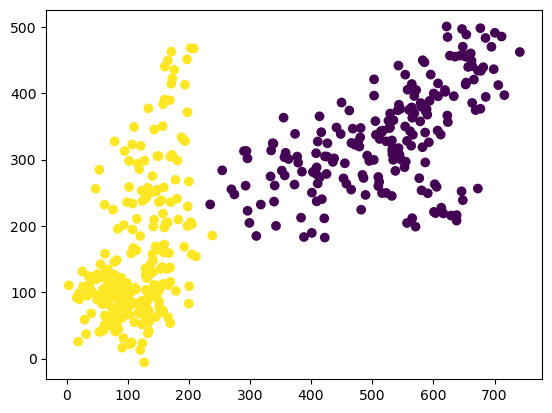

In [6]:
plt.scatter(data['x'],data['y'],c=y)

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.3)


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,QuantileTransformer,PolynomialFeatures
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier


mod1= LogisticRegression()
mod2 = KNeighborsClassifier(n_neighbors=5)
mod3 = LinearRegression()

pipe=Pipeline(
    [
        ("scale", StandardScaler()),
        ("models", mod1)
    ])

y_pred = pd.DataFrame(pipe.fit(X_train,y_train).predict(X_test))
y_pred.index = y_test.index
y_pred= y_pred.rename(columns={0:'b'})

y_tild=pd.concat([y_train,y_pred],axis=1)


y_tild= y_tild.fillna(0)
y_tild['c']= y_tild['a'] + y_tild['b']

pd.concat([X,y_tild['c']],axis= 1)
#pd.concat([X,y],axis=1)

y_tild['c'].sort_index()

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
437    0.0
438    0.0
439    0.0
440    0.0
441    0.0
Name: c, Length: 442, dtype: float64

In [9]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
mae

0.007518796992481203

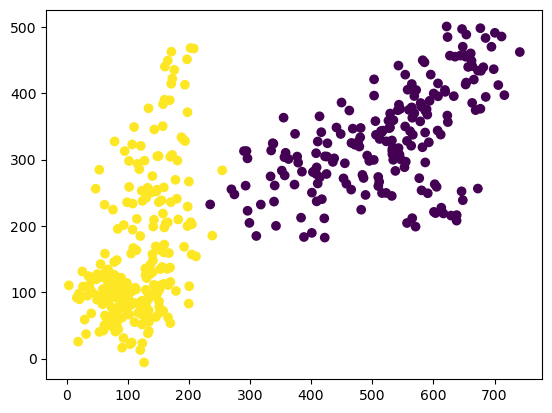

In [10]:
plt.scatter(data['x'],data['y'],c=y_tild['c'].sort_index())

/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (442). n_quantiles is set to n_samples.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


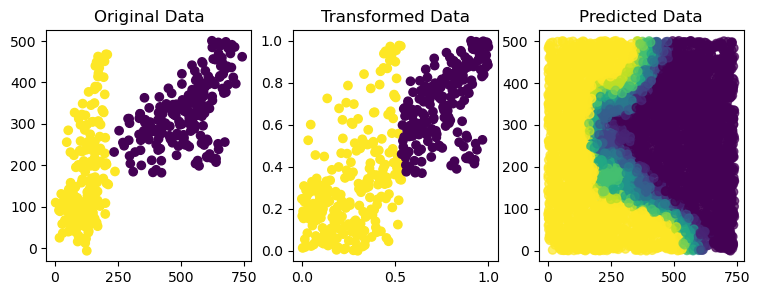

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=10))
    ])

    pred = pipe.fit(X, y).predict(X)

    # On trace le graphe non scalé des données
    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
    plt.title("Original Data")
    
    
    # On trace les données scalée
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    
    
    # On trace les points selon la proba d'appartenance ( mod.predict_proba : ne fonctionne que sur des classifiers ) au classe
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X.iloc[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X.iloc[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[ :,1], alpha=0.7)
    plt.title("Predicted Data")

plot_output(QuantileTransformer())
